In [7]:
import numpy as np

def TeoTi_mos(beta, Rhigh=1, Rlow=1):
    return (1+beta*beta) / (beta*beta*Rhigh + Rlow)

def TeoTi_ana(beta,f=0.5,beta_crit=1.):
    #return f*np.exp(-beta/beta_crit)
    return f*np.exp(-beta/beta_crit)/(1.-f*np.exp(-beta/beta_crit))

In [8]:
beta = np.logspace(-2,1,200)

TeoTi_Rh1   = TeoTi_mos(beta,Rhigh=1)
TeoTi_Rh20  = TeoTi_mos(beta,Rhigh=20)
TeoTi_Rh40  = TeoTi_mos(beta,Rhigh=40)
TeoTi_Rh80  = TeoTi_mos(beta,Rhigh=80)
TeoTi_Rh160 = TeoTi_mos(beta,Rhigh=160)

TeoTi_f05bc1   = TeoTi_ana(beta,f=0.5,beta_crit=1.)
TeoTi_f01bc1   = TeoTi_ana(beta,f=0.1,beta_crit=1.)
TeoTi_f05bc033 = TeoTi_ana(beta,f=0.5,beta_crit=0.33)

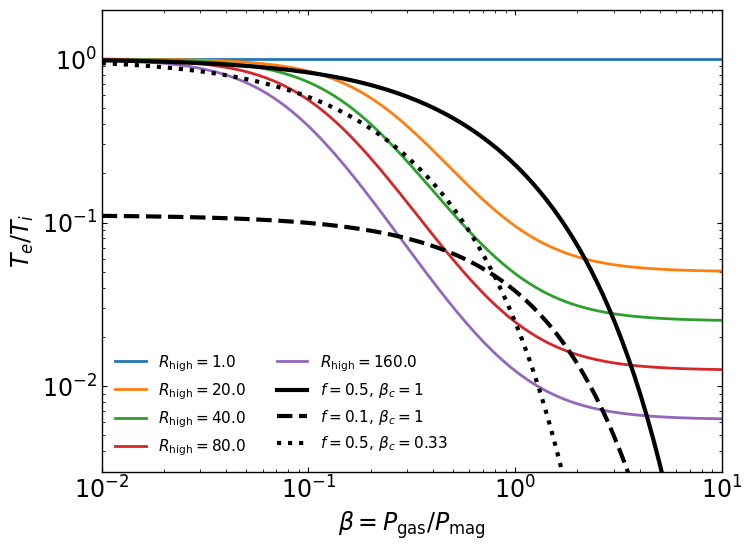

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()

ax.plot(beta,TeoTi_Rh1, lw=2, label=r'$R_{\rm high}=1.0$')
ax.plot(beta,TeoTi_Rh20, lw=2, label=r'$R_{\rm high}=20.0$')
ax.plot(beta,TeoTi_Rh40, lw=2, label=r'$R_{\rm high}=40.0$')
ax.plot(beta,TeoTi_Rh80, lw=2, label=r'$R_{\rm high}=80.0$')
ax.plot(beta,TeoTi_Rh160, lw=2, label=r'$R_{\rm high}=160.0$')

ax.plot(beta,TeoTi_f05bc1, lw=3, color='black', label=r'$f=0.5,\, \beta_c=1$')
ax.plot(beta,TeoTi_f01bc1, lw=3, ls='--', color='black', label=r'$f=0.1,\, \beta_c=1$')
ax.plot(beta,TeoTi_f05bc033, lw=3, ls=':', color='black', label=r'$f=0.5,\, \beta_c=0.33$')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-2,1e1)
ax.set_ylim(3e-3,2)

ax.set_xlabel(r'$\beta = P_{\rm gas}/P_{\rm mag}$')
ax.set_ylabel(r'$T_e/T_i$')

ax.legend(loc='best', ncol=2, fontsize=11, frameon=False)

In [10]:
from pyds.tools import readcol
import os

fdir = '/home/astrodoo/scratch/BHOSS_EHT/bhoss_SA93/f05b1/BHOSS_CODE'
fname = 'test.txt'

beta_sim, Te_Ti_sim = readcol(os.path.join(fdir,fname),format=['f','f'])

In [11]:
print(beta_sim)
print(Te_Ti_sim)

[ 0.01035  0.01035  0.01072  0.01109  0.01148  0.01189  0.0123   0.01274
  0.01318  0.01365  0.01413  0.01462  0.01514  0.01567  0.01622  0.01679
  0.01738  0.01799  0.01862  0.01928  0.01995  0.02065  0.02138  0.02213
  0.02291  0.02371  0.02455  0.02541  0.0263   0.02723  0.02818  0.02917
  0.0302   0.03126  0.03236  0.0335   0.03467  0.03589  0.03715  0.03846
  0.03981  0.04121  0.04266  0.04416  0.04571  0.04732  0.04898  0.0507
  0.05248  0.05433  0.05623  0.05821  0.06026  0.06237  0.06457  0.06683
  0.06918  0.07161  0.07413  0.07674  0.07943  0.08222  0.08511  0.0881
  0.0912   0.09441  0.09772  0.10116  0.10471  0.10839  0.1122   0.11614
  0.12023  0.12445  0.12882  0.13335  0.13804  0.14289  0.14791  0.15311
  0.15849  0.16406  0.16982  0.17579  0.18197  0.18836  0.19498  0.20184
  0.20893  0.21627  0.22387  0.23174  0.23988  0.24831  0.25704  0.26607
  0.27542  0.2851   0.29512  0.30549  0.31623  0.32734  0.33884  0.35075
  0.36308  0.37584  0.38905  0.40272  0.41687  0.4315

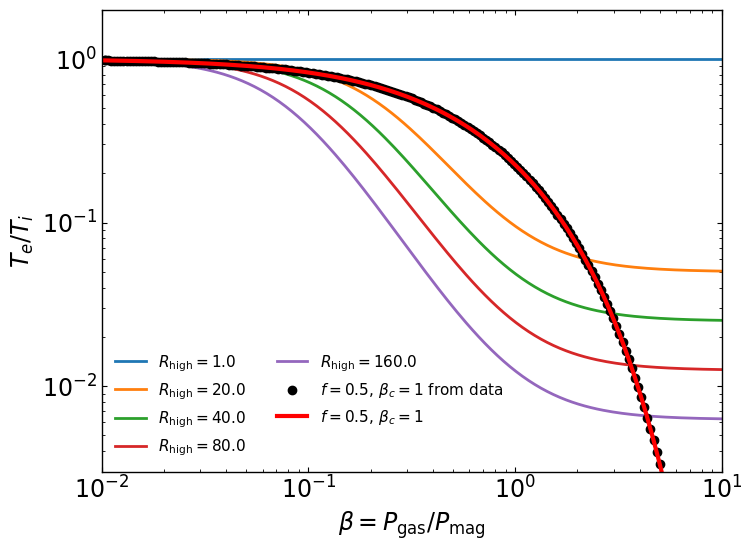

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()

ax.plot(beta,TeoTi_Rh1, lw=2, label=r'$R_{\rm high}=1.0$')
ax.plot(beta,TeoTi_Rh20, lw=2, label=r'$R_{\rm high}=20.0$')
ax.plot(beta,TeoTi_Rh40, lw=2, label=r'$R_{\rm high}=40.0$')
ax.plot(beta,TeoTi_Rh80, lw=2, label=r'$R_{\rm high}=80.0$')
ax.plot(beta,TeoTi_Rh160, lw=2, label=r'$R_{\rm high}=160.0$')

ax.plot(beta_sim, Te_Ti_sim, 'o', color='black', label=r'$f=0.5,\, \beta_c=1$ from data')
ax.plot(beta,TeoTi_f05bc1, lw=3, color='red', label=r'$f=0.5,\, \beta_c=1$')
#ax.plot(beta,TeoTi_f01bc1, lw=3, ls='--', color='black', label=r'$f=0.1,\, \beta_c=1$')
#ax.plot(beta,TeoTi_f05bc033, lw=3, ls=':', color='black', label=r'$f=0.5,\, \beta_c=0.33$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-2,1e1)
ax.set_ylim(3e-3,2)

ax.set_xlabel(r'$\beta = P_{\rm gas}/P_{\rm mag}$')
ax.set_ylabel(r'$T_e/T_i$')

ax.legend(loc='best', ncol=2, fontsize=11, frameon=False)